In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Global Dataset of EV Market

In [ ]:
df=pd.read_csv('/content/IEA Global EV Data 2023.csv');
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,4.600000e-04
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,1.700000e+02
...,...,...,...,...,...,...,...,...
9537,World,Projection-APS,EV stock,Trucks,PHEV,2030,Vehicles,9.100000e+05
9538,World,Projection-APS,EV stock,Vans,BEV,2030,Vehicles,1.200000e+07
9539,World,Projection-APS,EV stock,Vans,PHEV,2030,Vehicles,1.300000e+06
9540,World,Projection-APS,EV stock,Cars,BEV,2030,Vehicles,1.800000e+08


# `Data Preprocessing`

In [ ]:
df['mode'].unique()

array(['Cars', 'EV', 'Buses', 'Vans', 'Trucks'], dtype=object)

In [ ]:
df['region'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'EU27', 'Europe', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Indonesia', 'Israel',
       'Italy', 'Japan', 'Korea', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Other Europe', 'Poland', 'Portugal',
       'Rest of the world', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkiye', 'United Kingdom', 'USA',
       'World'], dtype=object)

In [ ]:
df['unit'].unique()

array(['Vehicles', 'percent', 'charging points', 'GWh',
       'Milion barrels per day', 'Oil displacement, million lge'],
      dtype=object)

In [ ]:
vehicle=df[df['unit']=='Vehicles']
vehicle

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
7,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0
...,...,...,...,...,...,...,...,...
9537,World,Projection-APS,EV stock,Trucks,PHEV,2030,Vehicles,910000.0
9538,World,Projection-APS,EV stock,Vans,BEV,2030,Vehicles,12000000.0
9539,World,Projection-APS,EV stock,Vans,PHEV,2030,Vehicles,1300000.0
9540,World,Projection-APS,EV stock,Cars,BEV,2030,Vehicles,180000000.0


In [ ]:
vehicle=vehicle[vehicle['parameter']=='EV sales']
vehicle

,region,category,parameter,mode,powertrain,year,unit,value
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0
10,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0
15,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0
...,...,...,...,...,...,...,...,...
9529,World,Projection-APS,EV sales,Trucks,PHEV,2030,Vehicles,190000.0
9530,World,Projection-APS,EV sales,Vans,BEV,2030,Vehicles,2800000.0
9531,World,Projection-APS,EV sales,Vans,PHEV,2030,Vehicles,360000.0
9532,World,Projection-APS,EV sales,Cars,BEV,2030,Vehicles,33000000.0


In [ ]:
sum_by_country = vehicle.groupby('region')['value'].sum().reset_index()
sum_by_country=sum_by_country[0:35]
sum_by_country

,region,value
0,Australia,8.633900e+04
1,Austria,1.635080e+05
2,Belgium,2.825080e+05
3,Brazil,4.097900e+04
4,Canada,4.125860e+05
5,Chile,2.972000e+03
6,China,8.815039e+07
7,Denmark,1.862070e+05
8,EU27,6.200786e+06
9,Europe,5.468836e+07


# Market Overview

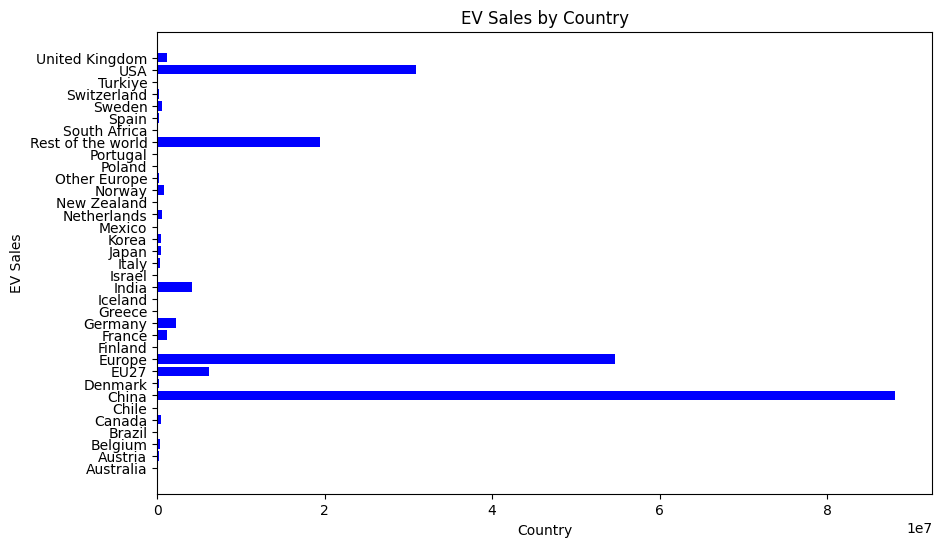

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(sum_by_country['region'], sum_by_country['value'], color='blue')
plt.xlabel('Country')
plt.ylabel('EV Sales')
plt.title('EV Sales by Country')
plt.show()

In [ ]:
modes=vehicle.groupby('mode')['value'].sum().reset_index()
modes

,mode,value
0,Buses,5.158375e+06
1,Cars,3.829216e+08
2,Trucks,5.667214e+06
3,Vans,1.961927e+07


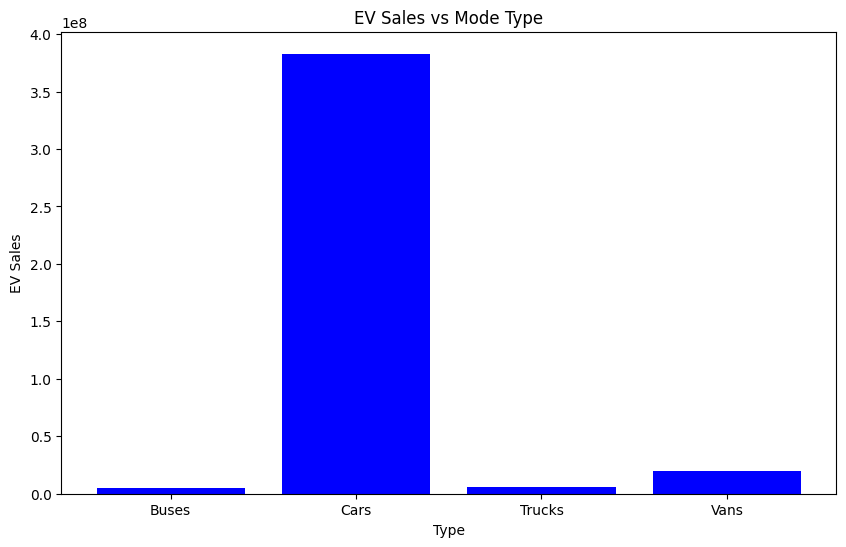

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(modes['mode'], modes['value'], color='blue')
plt.xlabel('Type')
plt.ylabel('EV Sales')
plt.title('EV Sales vs Mode Type')
plt.show()

This clearly shows Cars mode of transport dominate EV Market

In [ ]:
year=df.groupby('year')['value'].sum().reset_index()
year

,year,value
0,2010,1.617732e+05
1,2011,3.999840e+05
2,2012,9.213322e+05
3,2013,1.715497e+06
4,2014,2.967427e+06
5,2015,5.642564e+06
6,2016,8.375275e+06
7,2017,1.288132e+07
8,2018,2.004053e+07
9,2019,2.627572e+07


This Prediction and increasing sales in EV clearly shows that this market has lot of potential to build business

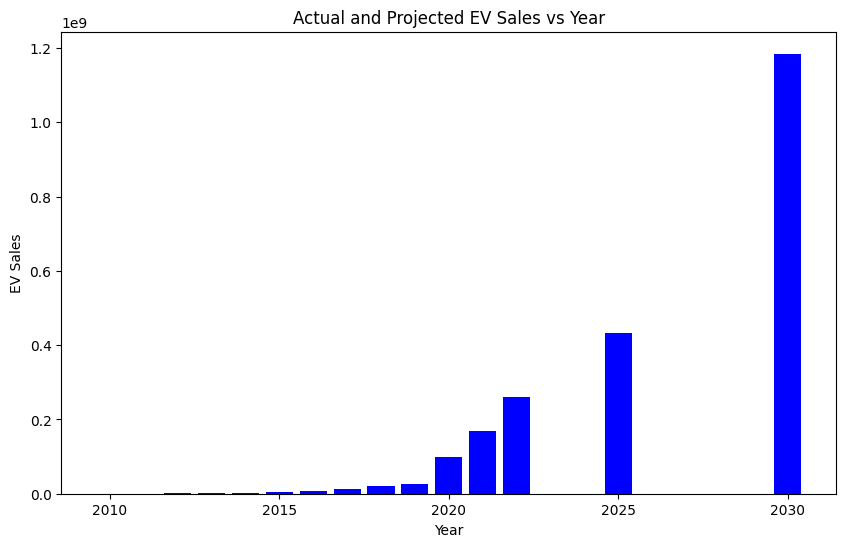

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(year['year'], year['value'], color='blue')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('Actual and Projected EV Sales vs Year')
plt.show()

In [ ]:
dt=pd.read_excel('/content/smev_data.xlsx');
dt

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,Hero Electric,0.30,Apr,1776
1,2019-20,Hero Electric,0.30,May,455
2,2019-20,Hero Electric,0.30,Jun,329
3,2019-20,Hero Electric,0.30,Jul,260
4,2019-20,Hero Electric,0.30,Aug,249
...,...,...,...,...,...
67,2019-20,Others,0.08,Nov,187
68,2019-20,Others,0.08,Dec,81
69,2019-20,Others,0.08,Jan,129
70,2019-20,Others,0.08,Feb,204


In [ ]:
maker=dt.groupby('maker')['market_share'].sum().reset_index()
maker

,maker,market_share
0,Ampere Vehicles,1.08
1,Ather Energy,1.32
2,Hero Electric,3.60
3,Okinawa Autotech,4.56
4,Others,0.96
5,Revolt,0.48


This shows us about the competitors in the market

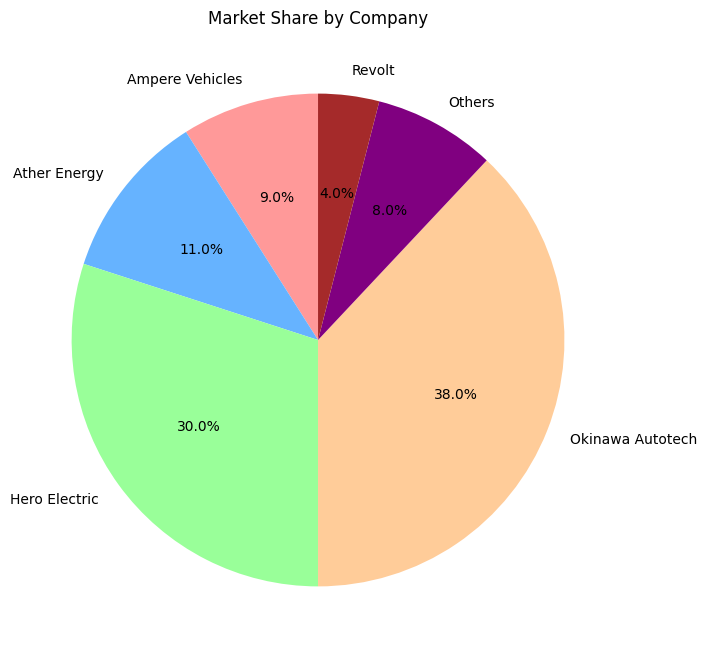

In [ ]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(maker['market_share'], labels=maker['maker'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','purple','brown','cyan'])
plt.title('Market Share by Company')
plt.show()

In [ ]:
sold=dt.groupby('maker')['num_vehicles'].sum().reset_index()
sold

,maker,num_vehicles
0,Ampere Vehicles,2518
1,Ather Energy,2905
2,Hero Electric,7865
3,Okinawa Autotech,10135
4,Others,2026
5,Revolt,1063


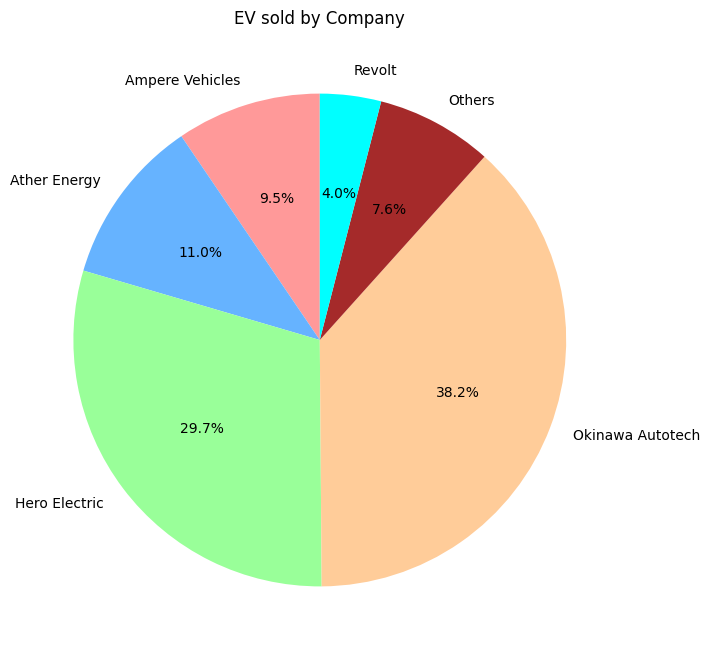

In [ ]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sold['num_vehicles'], labels=sold['maker'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','brown','cyan'])
plt.title('EV sold by Company')
plt.show()

## Psycographic Segmentation

In [ ]:
data=pd.read_csv('/content/ev2_bikewale.csv');
data

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder
841,"Up to 2 years the condition was good,\r\nAfter...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder


In [ ]:
dg=data['Used it for'].value_counts().reset_index()
dg

,index,Used it for
0,Daily Commute,600
1,Everything,160
2,Occasional Commute,56
3,Leisure Rides,20
4,Tours,8


This clearly shows that EV for Daily commute is mostly prefered by people

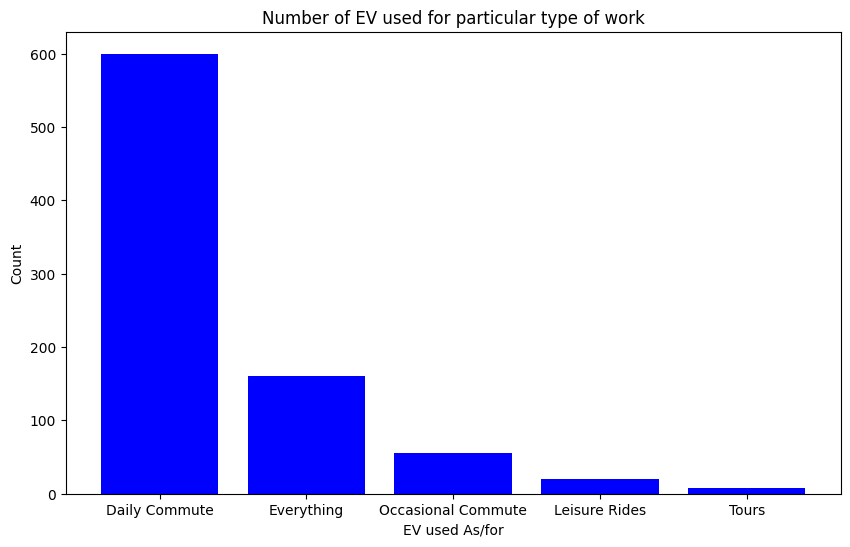

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dg['index'], dg['Used it for'], color='blue')
plt.xlabel('EV used As/for')
plt.ylabel('Count')
plt.title('Number of EV used for particular type of work')
plt.show()

In [ ]:
dh=data['rating'].value_counts().reset_index()
dh

,index,rating
0,5,341
1,1,239
2,4,151
3,3,65
4,2,48


This shows that mostly people are favouring EV's so it is good oppurtunity to target customers which do daily commute

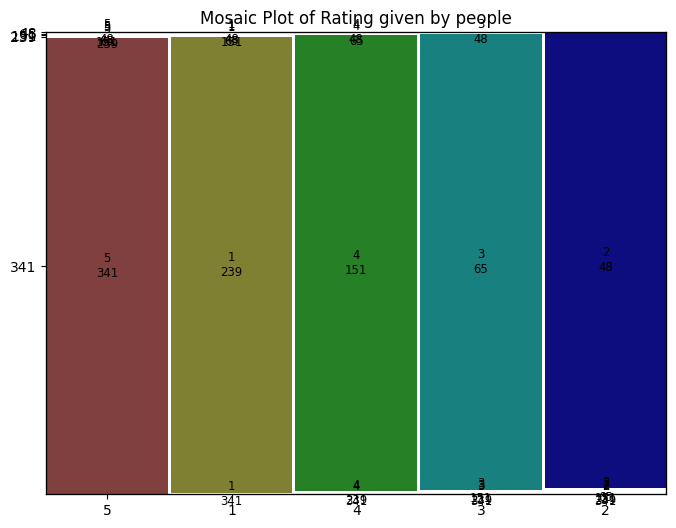

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
# Create a mosaic plot
fig, ax = plt.subplots(figsize=(8, 6))
mosaic(dh, ['index', 'rating'], ax=ax)

# Add labels and title
plt.title('Mosaic Plot of Rating given by people')
plt.show()

In [ ]:
make=data.groupby('Model Name')['rating'].sum().reset_index()
make

,Model Name,rating
0,Ampere Magnus EX,111
1,Ampere Magnus Pro,68
2,Ampere REO,62
3,Ampere Zeal,37
4,Ather 450X,110
5,BGauss B8,12
6,Bajaj Chetak,62
7,Benling Aura,63
8,Bounce Infinity E1,35
9,Evolet Polo,10


From this we can take motivation from Model which is most liked by people

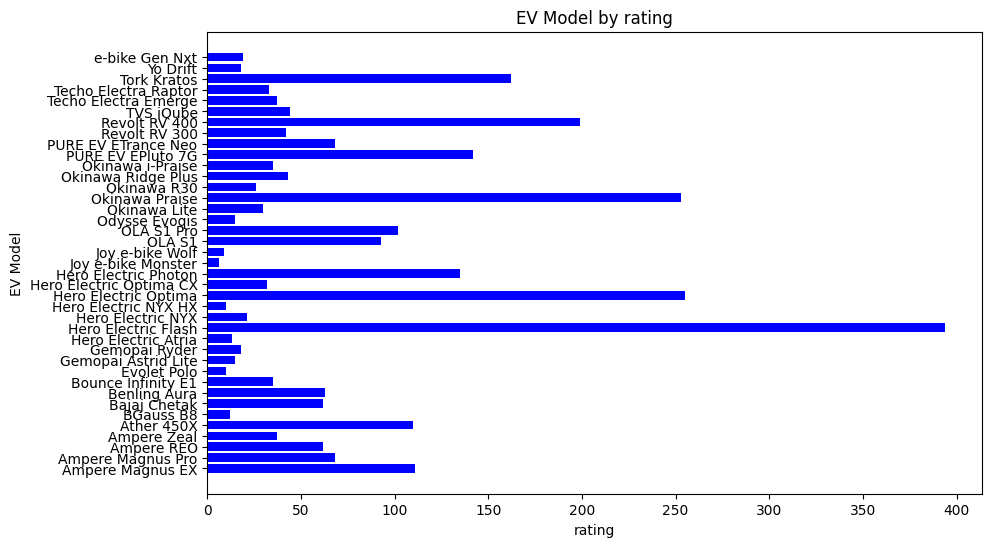

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(make['Model Name'], make['rating'], color='blue')
plt.xlabel('rating')
plt.ylabel('EV Model')
plt.title('EV Model by rating')
plt.show()

In [ ]:
d2=pd.read_csv('/content/ev_model_spec.csv')
d2

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000
5,Bajaj Chetak,131196,90,63,133,5,3800
6,Benling Aura,91667,120,60,66,6,2500
7,BGauss B8,62999,70,50,99,8,800
8,Bounce Infinity E1,100905,85,65,94,4,1500
9,e-bike Gen Nxt,74273,60,25,67,4,250


In [ ]:
Df=data.merge(d2, how = 'left', on = 'Model Name')
Df

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder,70821,90,25,80,4,250
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder,70821,90,25,80,4,250
841,"Up to 2 years the condition was good,\r\nAfter...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder,70821,90,25,80,4,250
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder,70821,90,25,80,4,250


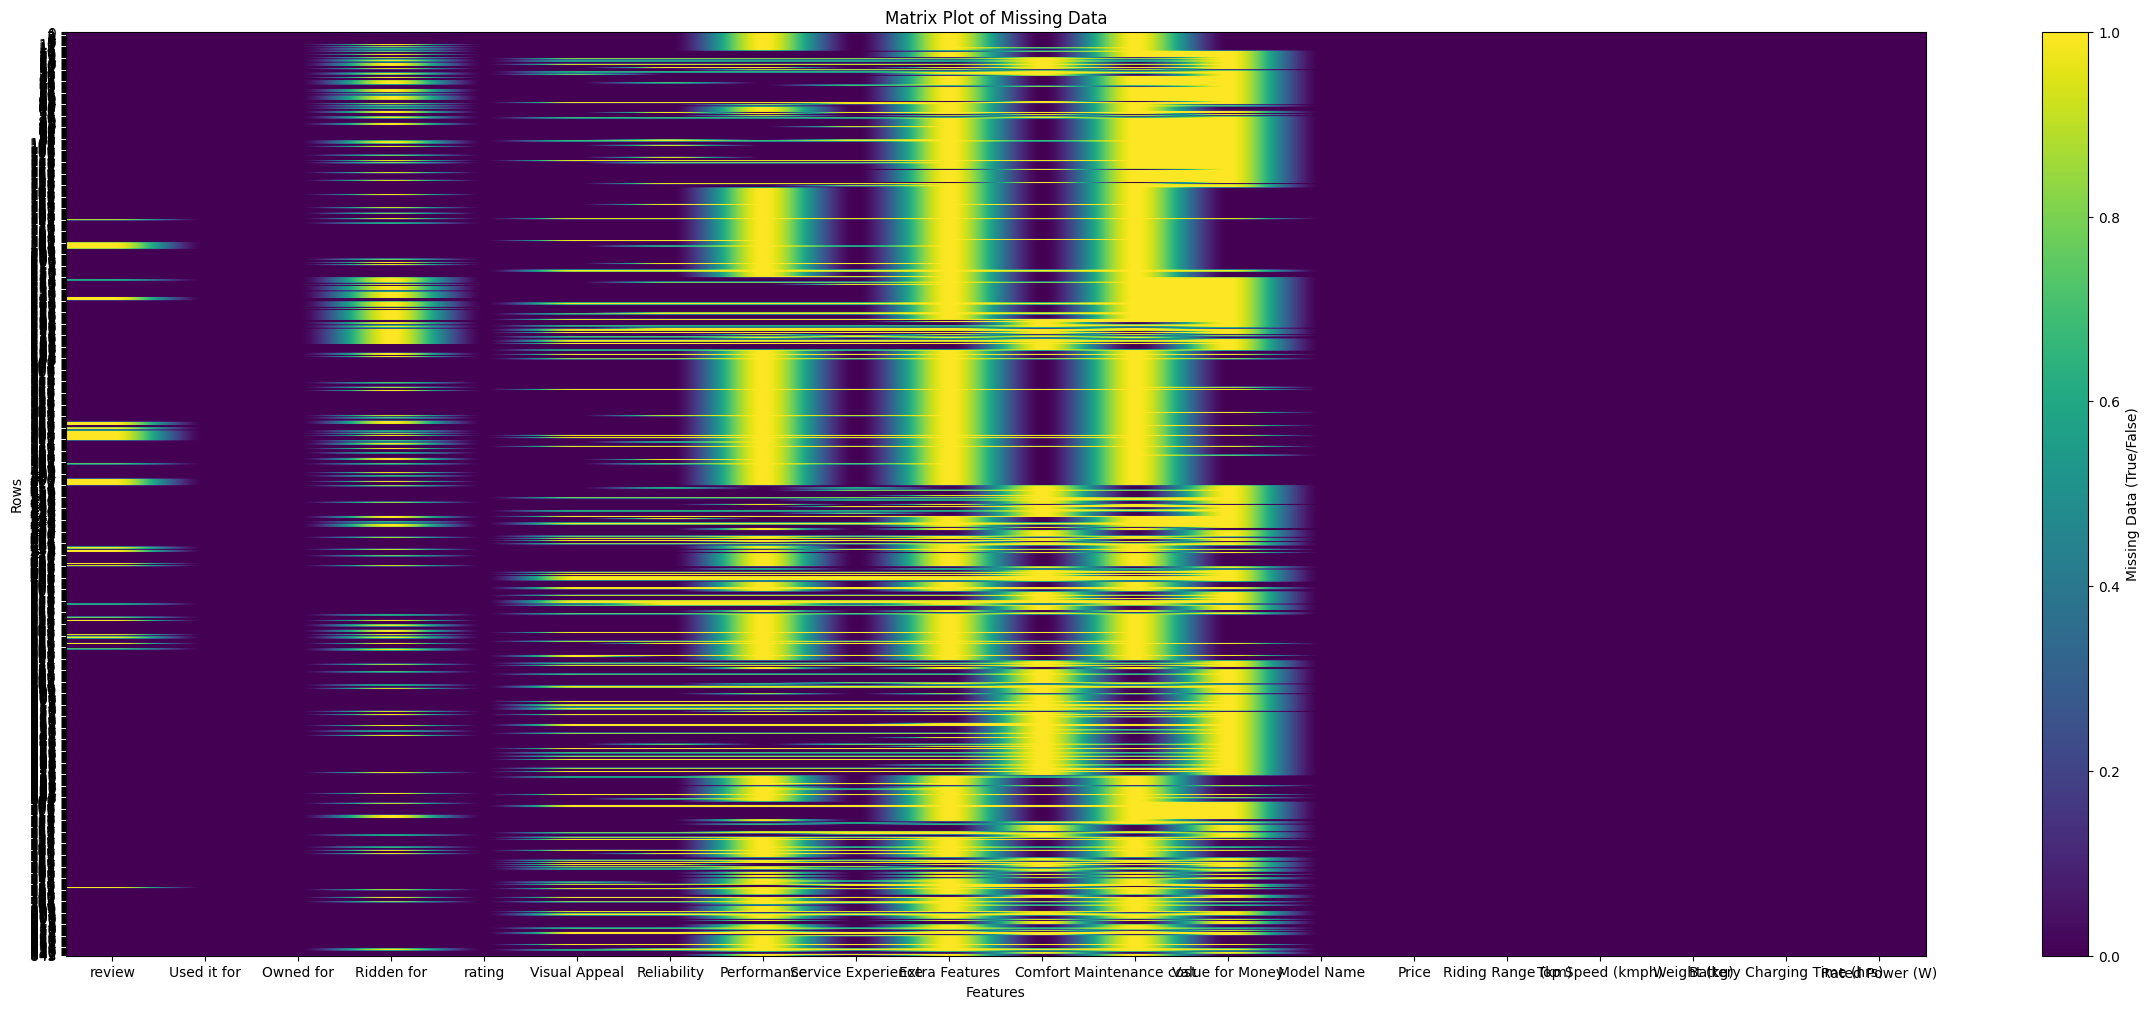

In [ ]:
# Create a matrix plot using matplotlib
plt.figure(figsize=(30, 12))
plt.imshow(Df.isnull(), cmap='viridis', aspect='auto')

plt.xticks(range(Df.shape[1]), Df.columns)
plt.yticks(range(Df.shape[0]), Df.index)

plt.xlabel('Features')
plt.ylabel('Rows')

plt.title('Matrix Plot of Missing Data')
plt.colorbar(label='Missing Data (True/False)')

plt.show()

In [ ]:
# Percentage of missing values
(Df.isnull().sum()*100/Df.shape[0]).sort_values(ascending = False)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [ ]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
ds=Df[['review','Used it for','Owned for','Ridden for']].copy()
ds

,review,Used it for,Owned for,Ridden for
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms
...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms
841,"Up to 2 years the condition was good,\r\nAfter...",Daily Commute,> 1 yr,5000-10000 kms
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms


This shows that there is a good number of Positive sentiment among people for EVs

In [ ]:
# Create a SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Perform sentiment analysis and update 'sentiment' column
sentiments_list = []

for review in ds['review']:
    if pd.isna(review):
        sentiments_list.append('neutral')
        continue

    sentiment_scores = sentiments.polarity_scores(review)
    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)

ds['sentiment'] = sentiments_list

# Print the updated DataFrame
ds['sentiment'].value_counts()

positive    527
negative    264
neutral      53
Name: sentiment, dtype: int64

In [ ]:
dpca=Df[['rating','Visual Appeal','Reliability','Performance','Service Experience','Value for Money','Comfort','Maintenance cost','Price','Riding Range (km)','Top Speed (kmph)','Weight (kg)','Battery Charging Time (hrs)','Rated Power (W)']].copy()
dpca

,rating,Visual Appeal,Reliability,Performance,Service Experience,Value for Money,Comfort,Maintenance cost,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,1,3.0,4.0,NaN,NaN,1.0,4.0,NaN,137890,100,78,117,5,3000
1,1,3.0,1.0,NaN,1.0,3.0,3.0,NaN,137890,100,78,117,5,3000
2,3,4.0,4.0,NaN,2.0,2.0,5.0,NaN,137890,100,78,117,5,3000
3,1,1.0,1.0,NaN,1.0,1.0,1.0,NaN,137890,100,78,117,5,3000
4,1,3.0,4.0,NaN,1.0,2.0,3.0,NaN,137890,100,78,117,5,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2,2.0,2.0,NaN,2.0,3.0,2.0,NaN,70821,90,25,80,4,250
840,5,5.0,5.0,5.0,5.0,NaN,NaN,5.0,70821,90,25,80,4,250
841,2,2.0,2.0,4.0,2.0,NaN,NaN,1.0,70821,90,25,80,4,250
842,5,4.0,4.0,NaN,NaN,5.0,4.0,NaN,70821,90,25,80,4,250


In [ ]:
# Replace NaN values with rounded average for each column
for column in dpca.columns:
    column_mean = dpca[column].mean()
    dpca[column] = dpca[column].fillna(round(column_mean))

dpca

,rating,Visual Appeal,Reliability,Performance,Service Experience,Value for Money,Comfort,Maintenance cost,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,1,3.0,4.0,4.0,3.0,1.0,4.0,3.0,137890,100,78,117,5,3000
1,1,3.0,1.0,4.0,1.0,3.0,3.0,3.0,137890,100,78,117,5,3000
2,3,4.0,4.0,4.0,2.0,2.0,5.0,3.0,137890,100,78,117,5,3000
3,1,1.0,1.0,4.0,1.0,1.0,1.0,3.0,137890,100,78,117,5,3000
4,1,3.0,4.0,4.0,1.0,2.0,3.0,3.0,137890,100,78,117,5,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2,2.0,2.0,4.0,2.0,3.0,2.0,3.0,70821,90,25,80,4,250
840,5,5.0,5.0,5.0,5.0,3.0,4.0,5.0,70821,90,25,80,4,250
841,2,2.0,2.0,4.0,2.0,3.0,4.0,1.0,70821,90,25,80,4,250
842,5,4.0,4.0,4.0,3.0,5.0,4.0,3.0,70821,90,25,80,4,250


Explained Variance Ratios:
[0.3673855  0.21897503 0.11168774 0.08665576 0.05571395 0.04409676
 0.02939218 0.02200168 0.0183421  0.01534579 0.01322771 0.01113462
 0.00604117]

Cumulative Explained Variance:
[0.3673855  0.58636053 0.69804827 0.78470403 0.84041798 0.88451474
 0.91390692 0.9359086  0.9542507  0.96959649 0.98282421 0.99395883
 1.        ]


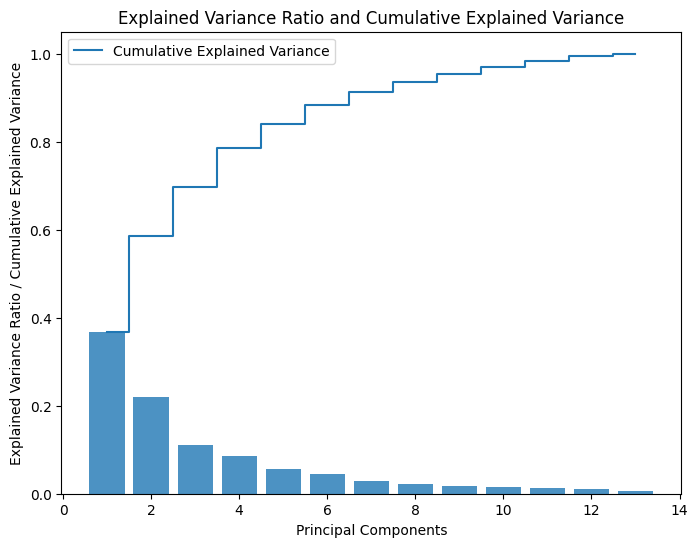

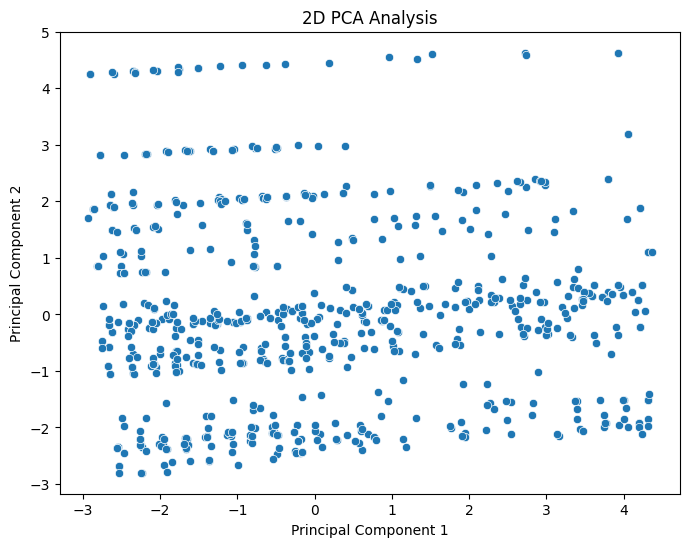

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = dpca.drop(columns=['Price'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print explained variance ratios
print("Explained Variance Ratios:")
print(explained_variance_ratio)

# Print cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Plot explained variance ratios
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.legend()
plt.show()

# Plot 2D PCA analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('2D PCA Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
ppca= pd.DataFrame(X_pca, columns = [f'PC{x +1}' for x in range(len(dpca.columns)-1)])
ppca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.074953,1.555727,-0.707335,-0.487938,-0.610021,-0.332047,-1.064133,-0.836413,-0.505596,1.516768,0.108940,-0.554277,0.315783
1,2.240050,1.430852,-0.150534,-0.294931,-0.298715,0.081119,0.021260,0.674159,-1.377728,-0.384978,-0.219212,0.180100,0.227376
2,-0.035038,1.418472,0.004646,-0.209284,-0.517724,-0.206347,-1.372003,-0.390189,-0.679563,0.246807,0.746634,-0.596836,0.311677
3,4.035874,1.688397,-1.630410,-0.737653,-0.471379,-0.441554,0.917937,-0.434981,-0.665318,0.338784,0.390109,0.129900,0.189904
4,1.653460,1.475994,-0.618510,-0.429169,-0.517783,-0.167931,-0.242234,0.135979,-0.839081,0.673421,0.394178,-1.330862,0.249096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2.317538,-1.669967,-0.555741,-0.641454,0.612605,-0.508020,0.969003,-0.108136,-0.067932,-0.261567,-0.434574,-0.170428,0.155881
840,-2.464312,-1.979844,-2.124368,-1.491531,0.938607,0.920256,-0.307327,-0.240451,0.341016,0.093431,-0.044243,-0.002177,0.285802
841,2.229172,-1.594563,1.760120,0.325664,-0.120434,-2.520863,-0.060793,-0.723677,-0.210374,-0.242983,-0.604496,-0.207550,0.111963
842,-1.074509,-2.073110,0.870676,-0.166938,0.743863,-0.210308,0.770331,0.239611,-0.114913,-0.884230,0.073378,-0.392560,0.134268


from matplotlib import pyplot as plt
ppca['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ppca['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ppca['PC3'].plot(kind='hist', bins=20, title='PC3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ppca['PC4'].plot(kind='hist', bins=20, title='PC4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ppca.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ppca.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ppca.plot(kind='scatter', x='PC3', y='PC4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ppca.plot(kind='scatter', x='PC4', y='PC5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ppca['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ppca['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ppca['PC3'].plot(kind='line', figsize=(8, 4), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ppca['PC4'].plot(kind='line', figsize=(8, 4), title='PC4')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
dp=dpca.iloc[:,0:13]
dp

,rating,Visual Appeal,Reliability,Performance,Service Experience,Value for Money,Comfort,Maintenance cost,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs)
0,1,3.0,4.0,4.0,3.0,1.0,4.0,3.0,137890,100,78,117,5
1,1,3.0,1.0,4.0,1.0,3.0,3.0,3.0,137890,100,78,117,5
2,3,4.0,4.0,4.0,2.0,2.0,5.0,3.0,137890,100,78,117,5
3,1,1.0,1.0,4.0,1.0,1.0,1.0,3.0,137890,100,78,117,5
4,1,3.0,4.0,4.0,1.0,2.0,3.0,3.0,137890,100,78,117,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2,2.0,2.0,4.0,2.0,3.0,2.0,3.0,70821,90,25,80,4
840,5,5.0,5.0,5.0,5.0,3.0,4.0,5.0,70821,90,25,80,4
841,2,2.0,2.0,4.0,2.0,3.0,4.0,1.0,70821,90,25,80,4
842,5,4.0,4.0,4.0,3.0,5.0,4.0,3.0,70821,90,25,80,4


In [ ]:
fl = pd.DataFrame(pca.components_, columns = dp.columns, index = ppca.columns).T
fl.style.background_gradient(cmap = 'BuGn')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
rating,-0.414936,-0.031918,-0.017000,0.027656,0.007900,-0.117736,0.236185,-0.236272,0.239850,-0.453183,0.615132,0.241611,-0.023604
Visual Appeal,-0.394018,0.002407,0.002178,-0.074686,-0.096487,-0.055798,-0.370078,0.781990,0.225671,0.063629,0.081016,0.126491,0.027067
Reliability,-0.424232,-0.043593,-0.022743,0.005275,-0.043039,-0.008804,0.101864,-0.124550,0.100653,0.391186,0.174485,-0.772064,-0.008813
Performance,-0.275491,-0.021327,-0.467429,-0.231273,-0.238954,-0.506464,0.037483,-0.026758,-0.393246,-0.262689,-0.324967,-0.064099,-0.050857
Service Experience,-0.417474,-0.043819,0.011697,-0.036685,0.005066,-0.005664,0.208108,-0.256275,0.152159,0.555158,-0.319724,0.528805,-0.007638
Value for Money,-0.295467,-0.140347,0.439595,0.151337,0.136493,0.241005,0.492801,0.295068,-0.346673,-0.267467,-0.266720,-0.075096,-0.041512
Comfort,-0.336546,0.004268,0.351821,0.150302,0.035319,0.082676,-0.697284,-0.384906,-0.224715,-0.173027,-0.125556,-0.003280,0.041213
Maintenance cost,-0.171214,-0.022388,-0.556142,-0.230236,0.263391,0.714722,-0.074796,-0.025720,-0.086735,-0.109190,-0.018595,0.010320,0.039064
Price,-0.073161,0.505079,-0.034891,0.080635,0.401362,-0.129279,0.029231,-0.028920,0.513134,-0.268282,-0.419042,-0.161439,-0.124043
Riding Range (km),-0.041741,0.561283,0.017366,0.003711,0.063956,0.024000,-0.004304,0.059819,-0.392372,0.203822,0.270515,0.097143,-0.629703


## Vehicle features Segmentation

In [ ]:
dk=dp.iloc[:,8:14]
dk

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs)
0,137890,100,78,117,5
1,137890,100,78,117,5
2,137890,100,78,117,5
3,137890,100,78,117,5
4,137890,100,78,117,5
...,...,...,...,...,...
839,70821,90,25,80,4
840,70821,90,25,80,4
841,70821,90,25,80,4
842,70821,90,25,80,4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

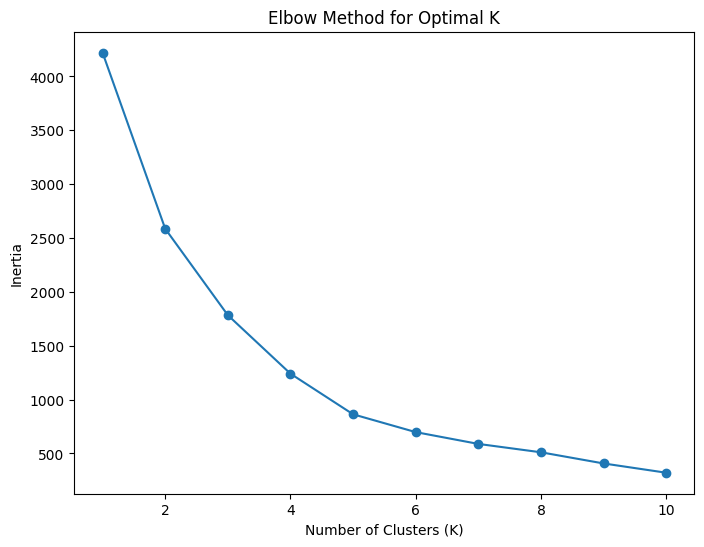

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
dk_scaled = scaler.fit_transform(dk)

# Determine optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dk_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



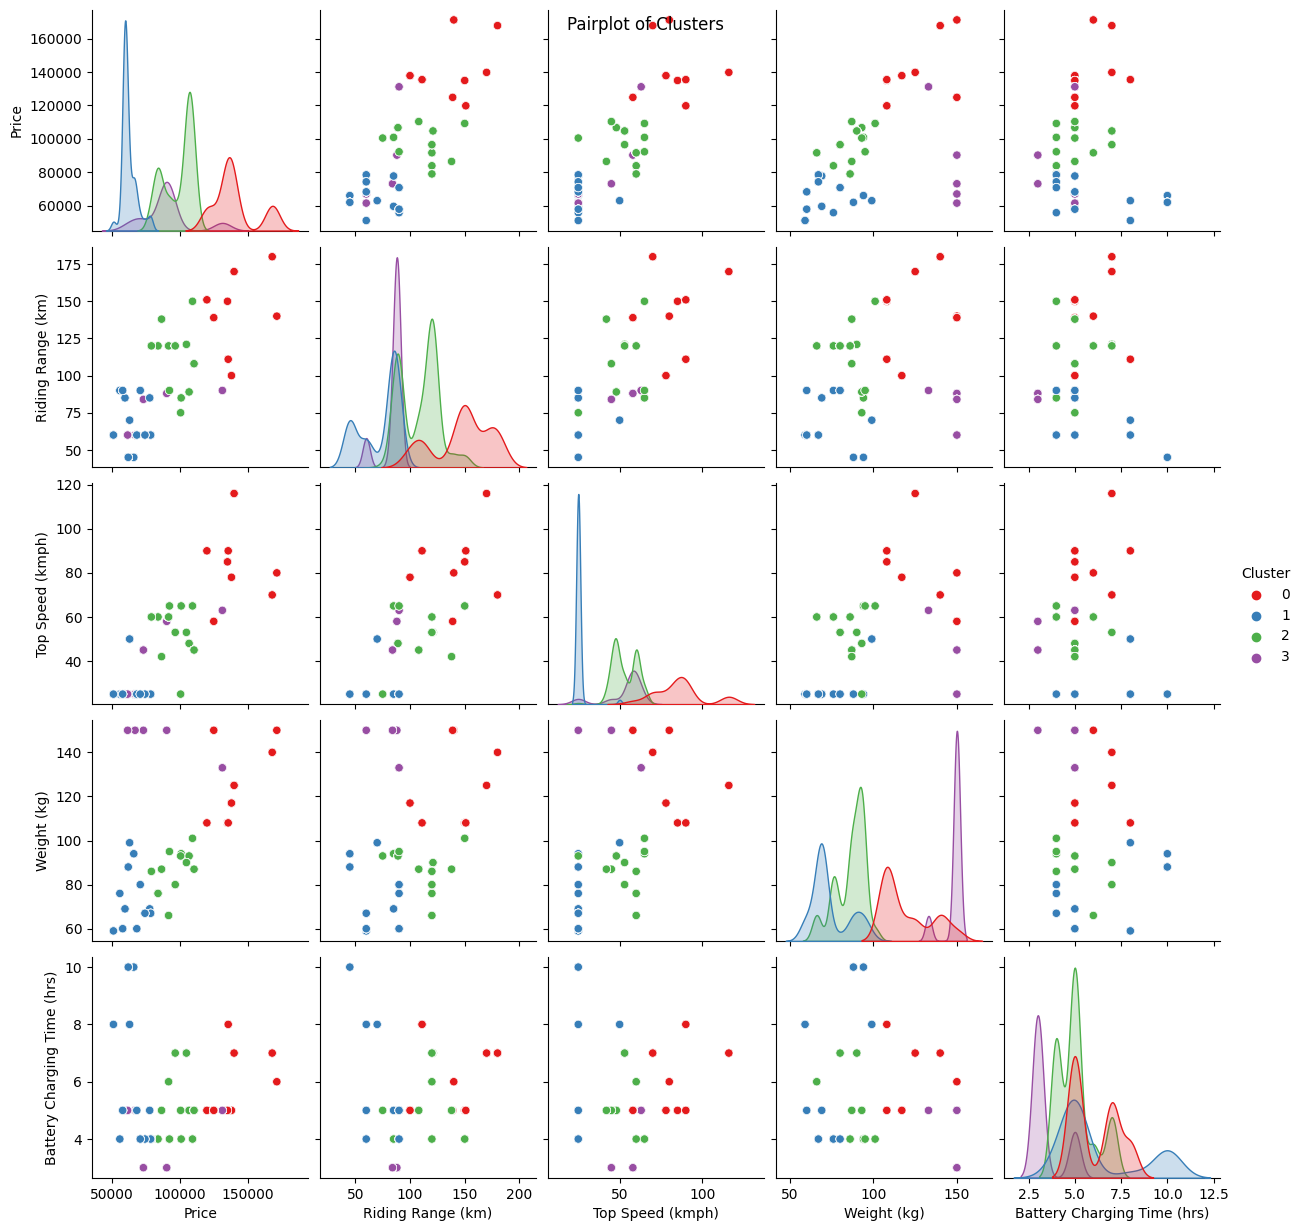

In [ ]:
# Choose the optimal K based on the Elbow Method (modify as needed)
optimal_k = 4

# Apply KMeans clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dk['Cluster'] = kmeans.fit_predict(dk_scaled)

# Visualize the clusters
sns.pairplot(dk, hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Clusters')
plt.show()

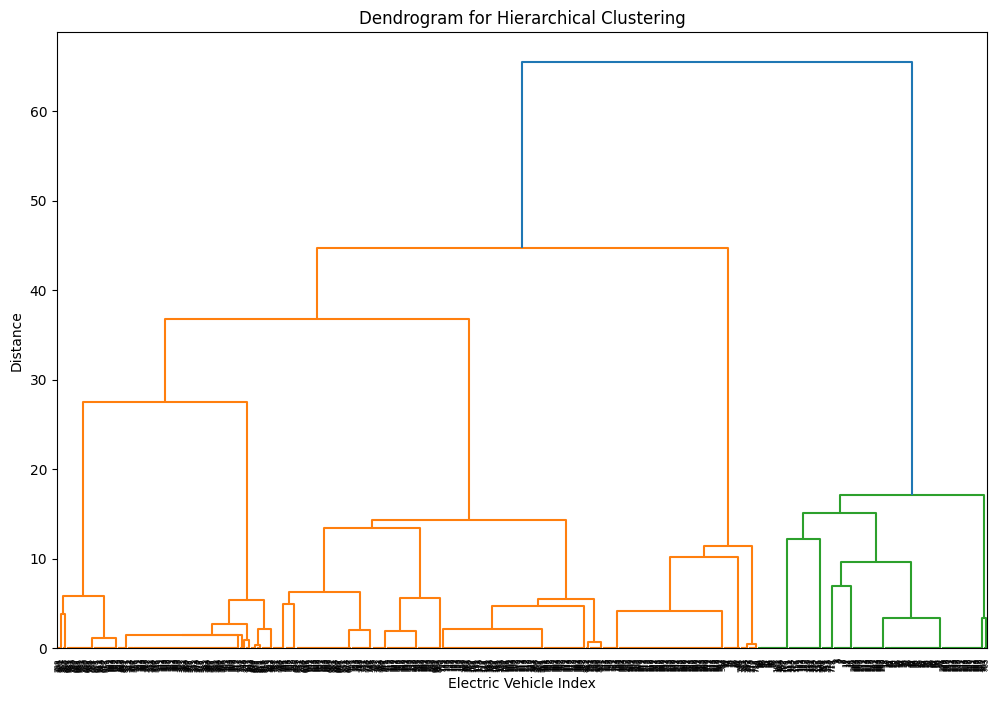

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize the data
scaler = StandardScaler()
dk_scaled = scaler.fit_transform(dk)

# Hierarchical clustering using AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=4)
dk['Cluster'] = agglomerative.fit_predict(dk_scaled)

# Plot dendrogram
linkage_matrix = linkage(dk_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=dk.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Electric Vehicle Index')
plt.ylabel('Distance')
plt.show()



## Demographic Segmentation

In [ ]:
dcp=pd.read_csv('/content/EV Count per State.csv')
dcp

,Sl. No.,State/UT-wise,Number of Electric/Hybrid Vehicle (approx.)
0,1,Jammu & Kashmir,478
1,2,Punjab,6925
2,3,Haryana,25908
3,4,Chandigarh,2533
4,5,Delhi,20228
5,6,Rajasthan,17405
6,7,Madhya Pradesh,6979
7,8,Gujarat,31577
8,9,Maharashtra,36708
9,10,Dadra and Nagar Haveli,820


In [ ]:
dcp=dcp.iloc[0:31,:]
dcp

,Sl. No.,State/UT-wise,Number of Electric/Hybrid Vehicle (approx.)
0,1,Jammu & Kashmir,478
1,2,Punjab,6925
2,3,Haryana,25908
3,4,Chandigarh,2533
4,5,Delhi,20228
5,6,Rajasthan,17405
6,7,Madhya Pradesh,6979
7,8,Gujarat,31577
8,9,Maharashtra,36708
9,10,Dadra and Nagar Haveli,820


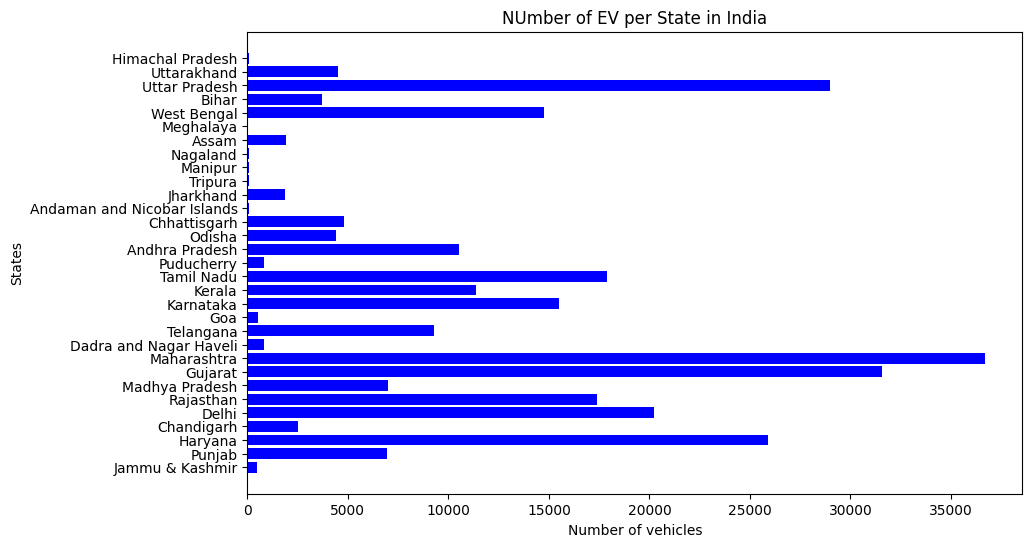

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh( dcp['State/UT-wise'],dcp['Number of Electric/Hybrid Vehicle (approx.)'], color='blue')
plt.xlabel('Number of vehicles')
plt.ylabel('States')
plt.title('NUmber of EV per State in India')
plt.show()

In [ ]:
charge=pd.read_csv('/content/EV Charge Points.csv')
charge

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


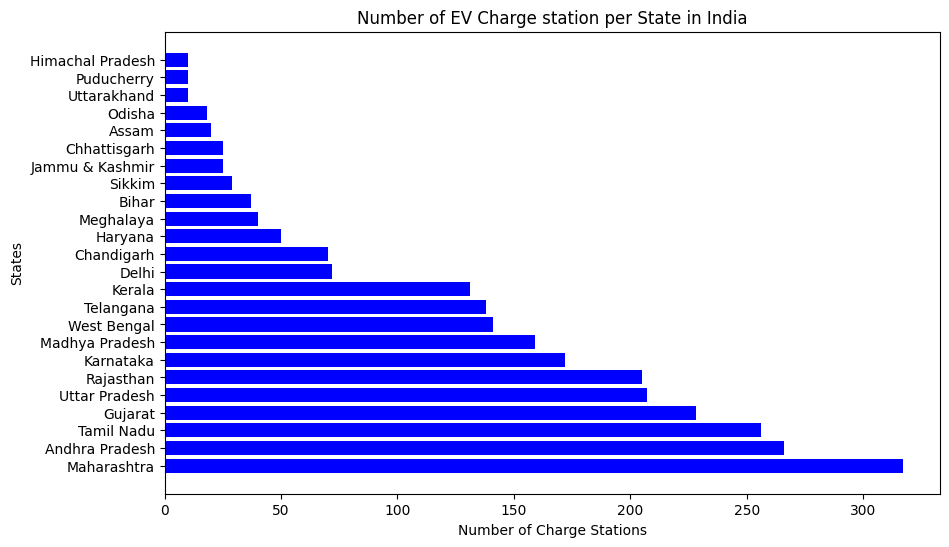

In [ ]:
charge=charge.iloc[0:24,:]
plt.figure(figsize=(10, 6))
plt.barh( charge['State/UT-wise'],charge['Number of Electric Vehicle Charging Sanctioned'], color='blue')
plt.xlabel('Number of Charge Stations')
plt.ylabel('States')
plt.title('Number of EV Charge station per State in India')
plt.show()

## Behavioural Segmentation

In [ ]:
bd=pd.read_csv('/content/behavioural_dataset.csv')
bd

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


This clearly shows us how married and single person are preffering to buy EV so we can make offers/ scheme accordingly

In [ ]:
import plotly.express as px

fig = px.histogram(bd, x='Marrital Status', color='Personal loan', barmode='group', category_orders={'Marrital Status': ['Single', 'Married', 'Divorced']})
fig.update_layout(
    xaxis=dict(title='Marital Status'),
    yaxis=dict(title='Count'),
    title='Distribution of Car Loan Status Across Marital Status',
    legend_title='Car Loan'
)
fig.show()

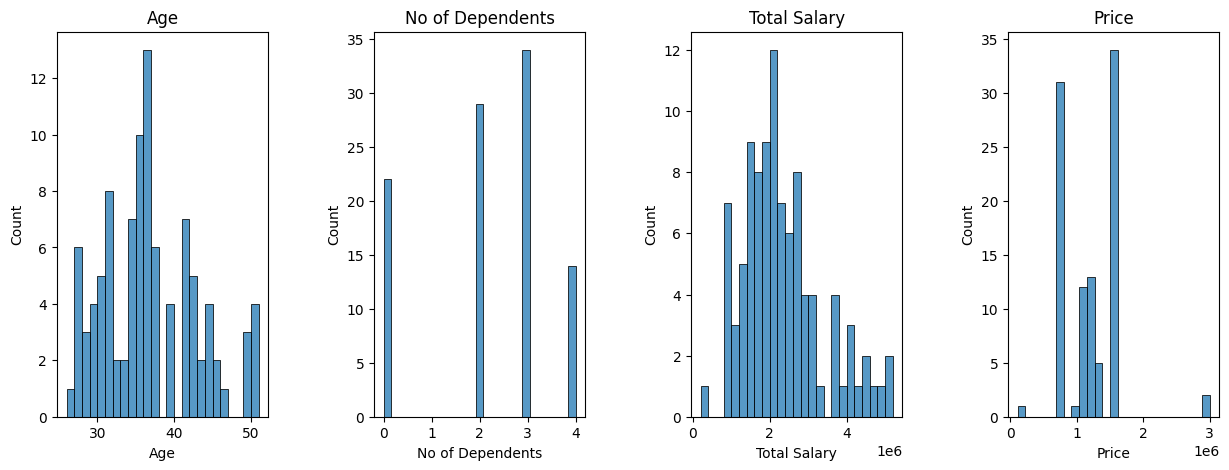

In [ ]:
plt.figure(1, figsize=(15, 5))
n = 0

for x in ['Age', 'No of Dependents', 'Total Salary', 'Price']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(bd[x], bins=25)
    plt.title(f'{x}')

plt.show()

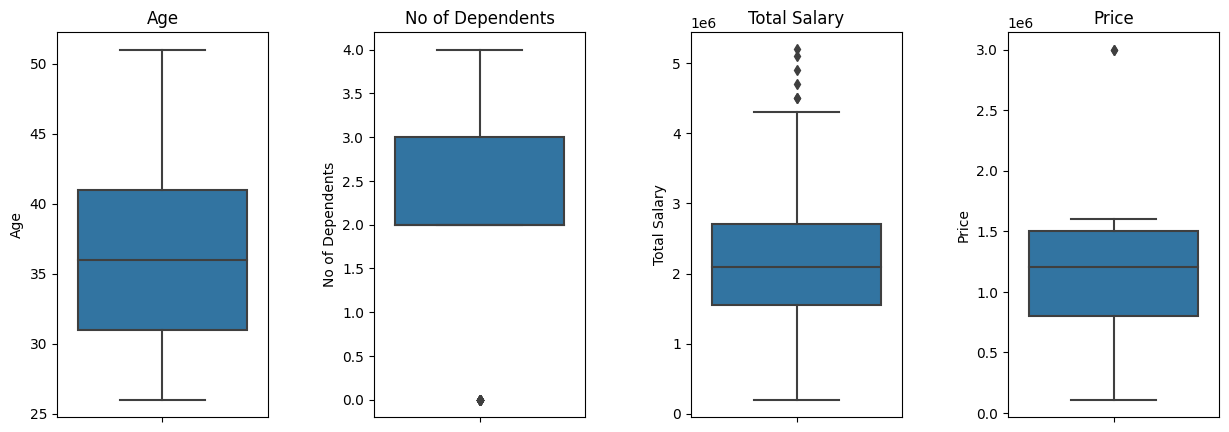

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

features = ['Age', 'No of Dependents', 'Total Salary', 'Price']

for i, feature in enumerate(features, 1):
    plt.subplot(1, 4, i)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.boxplot(y=bd[feature])
    plt.title(f'{feature}')

plt.show()

<ipython-input-68-505e10f96716>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



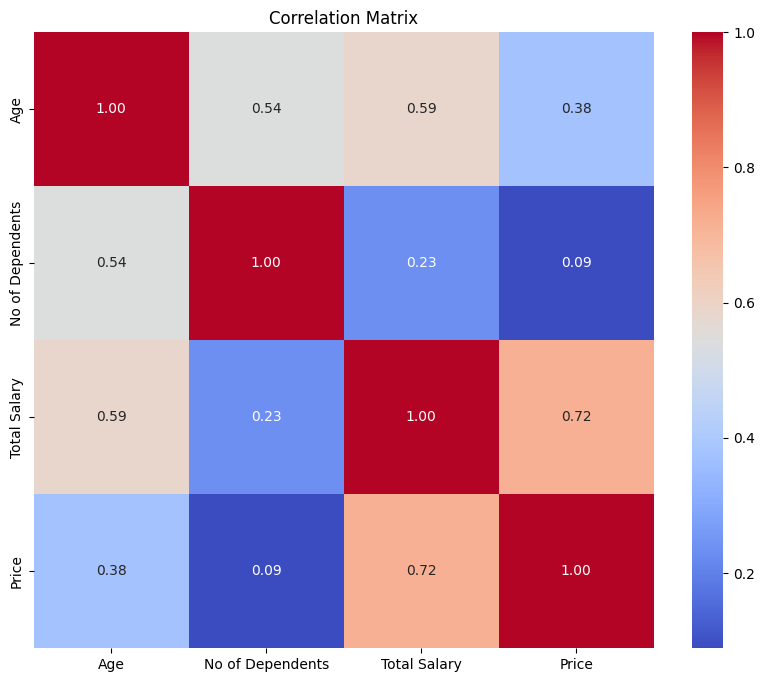

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = bd.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()